In [1]:
import pandas as pd
from statistics import mean, stdev
import scipy
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import glob
import numpy as np

In [28]:
plt.rcParams["figure.figsize"] = (8,8)

In [11]:
tb1 = pd.read_csv('architecture_csv/tensorboard_1/architecture_results.csv')

In [12]:
tb2 = pd.read_csv('architecture_csv/tensorboard_2/architecture_results.csv')

In [35]:
tb2['cost_tt'] = tb2['training_time(s)']/tb2['epochs']
tb1['cost_tt'] = tb1['training_time(s)']/tb1['epochs']

tb1['train_test_diff'] = tb1['train_result_acc']-tb1['test_result_acc']
tb2['train_test_diff'] = tb2['train_result_acc']-tb2['test_result_acc']

In [36]:
tb1

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,cost_tt,train_test_diff
0,architecture_1,925.754719,1.416316,0.5271,0.57710,1.222934,33,100,9.257547,0.05000
1,architecture_2,2234.455033,2.305277,0.5724,0.85440,0.734401,68,100,22.344550,0.28200
2,architecture_3,1132.373318,1.428850,0.4847,0.50194,1.364346,39,100,11.323733,0.01724
3,architecture_4,1201.968651,2.269118,0.6130,0.83956,0.785621,31,100,12.019687,0.22656
4,architecture_5,535.720109,1.199157,0.6409,0.83020,0.546289,26,100,5.357201,0.18930
5,architecture_6,1423.983149,2.498381,0.5487,0.77620,0.977802,26,100,14.239831,0.22750
6,architecture_7,1846.541642,2.520679,0.2815,0.29600,2.471866,41,100,18.465416,0.01450
7,architecture_8,5943.411448,1.580502,0.6466,0.74410,0.933658,124,58,102.472611,0.09750
8,architecture_9,696.833935,0.948242,0.6646,0.70150,0.842383,12,89,7.829595,0.03690
9,architecture_10,11956.074034,0.922451,0.6721,0.73050,0.786697,121,100,119.560740,0.05840


In [37]:
tb2

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,cost_tt,train_test_diff
0,architecture_1,1282.245481,1.396200,0.5223,0.62054,1.074336,33,200,6.411227,0.09824
1,architecture_2,2009.595819,2.242743,0.5812,0.85404,0.732443,68,99,20.298948,0.27284
2,architecture_3,2790.629588,1.399027,0.5050,0.52390,1.350592,39,154,18.120971,0.01890
3,architecture_4,1224.753774,2.389720,0.5945,0.82168,0.882543,31,107,11.446297,0.22718
4,architecture_5,1836.295358,1.256177,0.6426,0.85108,0.515056,26,143,12.841226,0.20848
5,architecture_6,1608.791005,2.724141,0.5386,0.76852,1.085312,26,127,12.667646,0.22992
6,architecture_7,1897.593510,3.379954,0.2318,0.22986,3.379912,41,109,17.409115,-0.00194
7,architecture_8,5351.144675,0.972148,0.7452,0.85772,0.468230,124,59,90.697367,0.11252
8,architecture_9,374.118893,0.896775,0.6797,0.73068,0.771784,12,120,3.117657,0.05098
9,architecture_10,10212.667561,0.991697,0.6513,0.70288,0.873252,121,87,117.386983,0.05158


<function matplotlib.pyplot.show(close=None, block=None)>

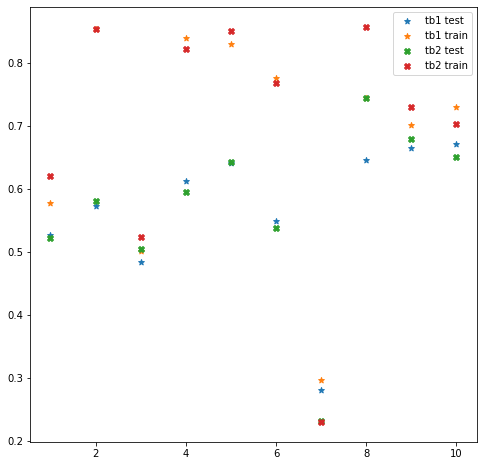

In [29]:
plt.scatter(range(1,len(tb1)+1), tb1['test_result_acc'], label="tb1 test", marker='*')
plt.scatter(range(1,len(tb1)+1), tb1['train_result_acc'], label="tb1 train",marker='*')
plt.scatter(range(1,len(tb2)+1), tb2['test_result_acc'], label="tb2 test", marker='X')
plt.scatter(range(1,len(tb2)+1), tb2['train_result_acc'], label="tb2 train", marker='X')

plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

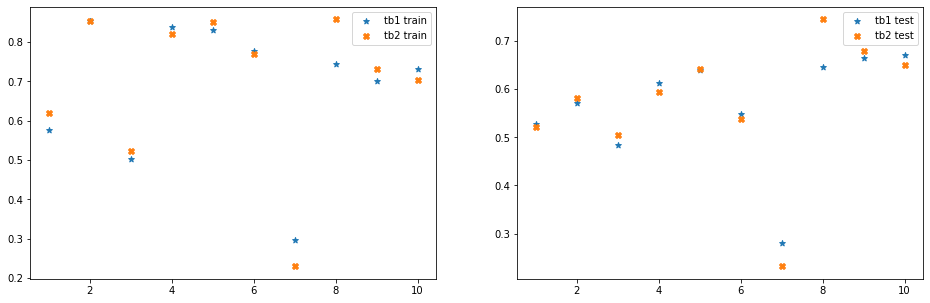

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))

ax1.scatter(range(1,len(tb1)+1), tb1['train_result_acc'], label="tb1 train",marker='*')
ax1.scatter(range(1,len(tb2)+1), tb2['train_result_acc'], label="tb2 train", marker='X')
ax1.legend()


ax2.scatter(range(1,len(tb1)+1), tb1['test_result_acc'], label="tb1 test", marker='*')
ax2.scatter(range(1,len(tb2)+1), tb2['test_result_acc'], label="tb2 test", marker='X')
ax2.legend()


plt.show

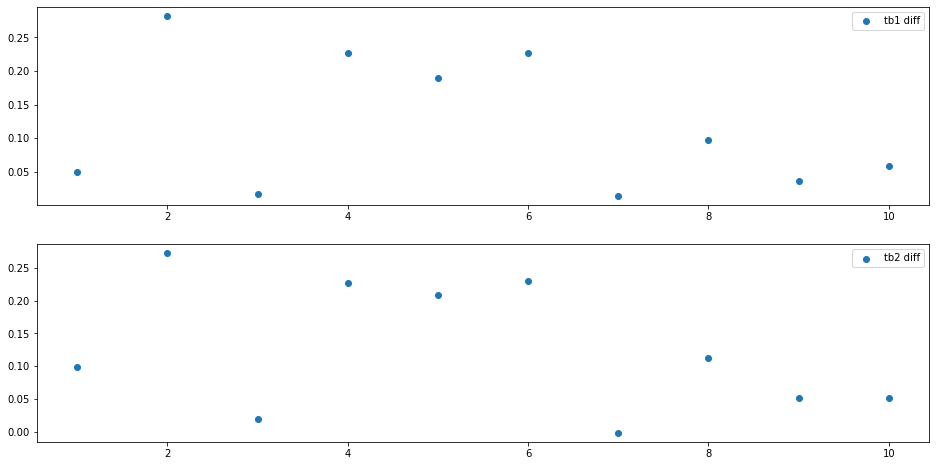

In [55]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(16,8))


ax1.scatter(range(1,len(tb1)+1), tb1['train_test_diff'], label="tb1 diff")
ax1.legend()

ax2.scatter(range(1,len(tb2)+1), tb2['train_test_diff'], label="tb2 diff")
ax2.legend()

<AxesSubplot:ylabel='cost_tt'>

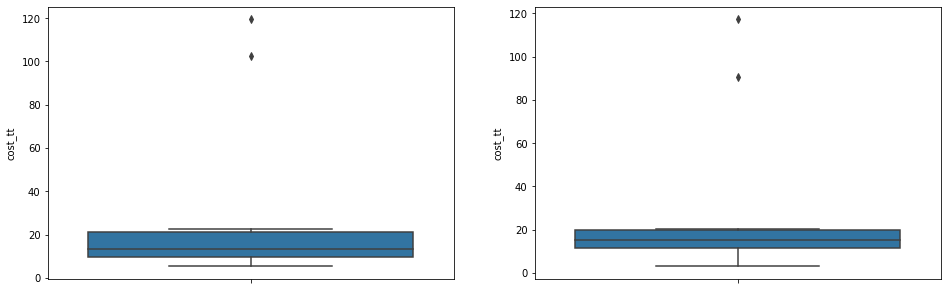

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))
sns.boxplot(
    y = 'cost_tt',
    data = tb1,
    ax = ax1
)

sns.boxplot(
    y = 'cost_tt',
    data = tb2,
    ax = ax2
)